In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Input

In [2]:
mydata = pd.read_csv('data.csv')
mydf = pd.DataFrame(data = mydata)

## Data Preprocessing
(1) Dropping data

In [3]:
mydf = mydf[(mydf['system'] == 'MacOS') | (mydf['system'] =='Windows')] 
mydf = mydf.reset_index()
mydf = mydf.drop(['index'],axis=1)
mydf

,gender,department,grade,money,system,time,communication,social,word_processing,entertainment,reading,coding,creation,apple,satisfy
0,男,電資學院及其相關科系,大三,8001~11999,MacOS,60 小時以上,5,4,3,1,6,2,7,是,同意
1,男,商/管理學院及其相關科系,大四或以上,8001~11999,MacOS,0~30 小時,7,5,2,1,4,3,6,是,非常同意
2,男,電資學院及其相關科系,大二,8001~11999,MacOS,31~60 小時,5,6,2,3,4,1,7,是,同意
3,男,電資學院及其相關科系,大四或以上,8001~11999,MacOS,31~60 小時,2,6,3,4,5,1,7,是,同意
4,女,電資學院及其相關科系,大三,8001~11999,MacOS,31~60 小時,5,6,4,1,3,2,7,是,同意
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,女,商/管理學院及其相關科系,大四或以上,8001~11999,Windows,0~30 小時,5,6,1,4,2,3,7,是,同意
216,女,商/管理學院及其相關科系,大二,8000以下,Windows,31~60 小時,2,1,3,5,4,6,7,否,同意
217,女,教育學院,大三,8000以下,Windows,31~60 小時,2,3,4,1,5,7,6,否,同意
218,男,醫學院及相關科系,大一,8001~11999,Windows,0~30 小時,2,1,3,5,4,6,7,是,非常同意


(2) Transforming data format

In [4]:
for i in range(len(mydf)):
    ## money
    if mydf.loc[i,'money'] == '8000以下':
        mydf.loc[i,'money'] = 'low'
    elif mydf.loc[i,'money'] == '8001~11999':
        mydf.loc[i,'money'] = 'medium'
    else:
        mydf.loc[i,'money'] = 'high'
    ## time
    if mydf.loc[i,'time'] == '0~30 小時':
        mydf.loc[i,'time'] = 'low'
    elif mydf.loc[i,'time'] == '31~60 小時':
        mydf.loc[i,'time'] = 'medium'
    else:
        mydf.loc[i,'time'] = 'high'
    ## satisfy
    if mydf.loc[i,'apple'] == '是':
        mydf.loc[i,'apple'] = 1
    else:
        mydf.loc[i,'apple'] = 0
    if mydf.loc[i,'satisfy'] == '非常同意':
        mydf.loc[i, 'satisfy'] = '5'
    elif mydf.loc[i,'satisfy'] == '同意':
        mydf.loc[i, 'satisfy'] = '4'
    elif mydf.loc[i,'satisfy'] == '普通':
        mydf.loc[i, 'satisfy'] = '3'
    elif mydf.loc[i,'satisfy'] == '不同意':
        mydf.loc[i,'satisfy'] = '2'
    else:
        mydf.loc[i,'satisfy'] = '1'
    ## usage
    if mydf.loc[i,'communication'] in  [1, 2, 3]:
        mydf.loc[i,'communication'] = 1
    else:
        mydf.loc[i,'communication'] = 0
    if mydf.loc[i,'social'] in [1, 2, 3]:
        mydf.loc[i,'social'] = 1
    else:
        mydf.loc[i,'social'] = 0
    if mydf.loc[i,'word_processing'] in [1, 2, 3]:
        mydf.loc[i,'word_processing'] = 1
    else:
        mydf.loc[i,'word_processing'] = 0
    if mydf.loc[i,'entertainment'] in [1, 2, 3]:
        mydf.loc[i,'entertainment'] = 1
    else:
        mydf.loc[i,'entertainment'] = 0
    if mydf.loc[i,'reading'] in [1, 2, 3]:
        mydf.loc[i,'reading'] = 1
    else:
        mydf.loc[i,'reading'] = 0
    if mydf.loc[i,'coding'] in [1, 2, 3]:
        mydf.loc[i,'coding'] = 1
    else:
        mydf.loc[i,'coding'] = 0
    if mydf.loc[i,'creation'] in [1, 2, 3]:
        mydf.loc[i,'creation'] = 1
    else:
        mydf.loc[i,'creation'] = 0
    ## gender
    if mydf.loc[i,'gender'] == '男':
        mydf.loc[i,'gender'] = 'male'
    else:
        mydf.loc[i,'gender'] = 'female'
    ## grade
    if mydf.loc[i,'grade'] == '大一':
        mydf.loc[i,'grade'] = 1
    elif mydf.loc[i,'grade'] == '大二':
        mydf.loc[i,'grade'] = 2
    elif mydf.loc[i,'grade'] == '大三':
        mydf.loc[i,'grade'] = 3
    else:
        mydf.loc[i, 'grade'] = 4
mydf['temp'] = 'na'
mydf.loc[(mydf.department == '電資學院及其相關科系'), 'temp'] = 'eecs'
mydf.loc[(mydf.department == '工學院及其相關科系') | (mydf.department == '理學院及其相關科系'), 'temp'] = 's&t'
mydf.loc[(mydf.department != '工學院及其相關科系') & (mydf.department != '理學院及其相關科系') & (mydf.department != '電資學院及其相關科系'), 'temp'] = 'orthers'
mydf = mydf.drop(columns = 'department')
mydf = mydf.rename(columns = {'temp': 'department'})
mydf

,gender,grade,money,system,time,communication,social,word_processing,entertainment,reading,coding,creation,apple,satisfy,department
0,male,3,medium,MacOS,high,0,0,1,1,0,1,0,1,4,eecs
1,male,4,medium,MacOS,low,0,0,1,1,0,1,0,1,5,orthers
2,male,2,medium,MacOS,medium,0,0,1,1,0,1,0,1,4,eecs
3,male,4,medium,MacOS,medium,1,0,1,0,0,1,0,1,4,eecs
4,female,3,medium,MacOS,medium,0,0,0,1,1,1,0,1,4,eecs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,female,4,medium,Windows,low,0,0,1,0,1,1,0,1,4,orthers
216,female,2,low,Windows,medium,1,1,1,0,0,0,0,0,4,orthers
217,female,3,low,Windows,medium,1,1,0,1,0,0,0,0,4,orthers
218,male,1,medium,Windows,low,1,1,1,0,0,0,0,1,5,orthers


(2) Data visulization for choosing useful features

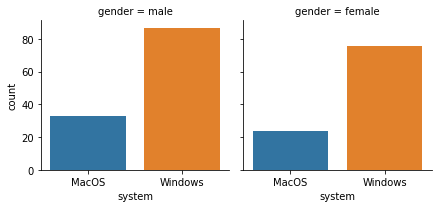

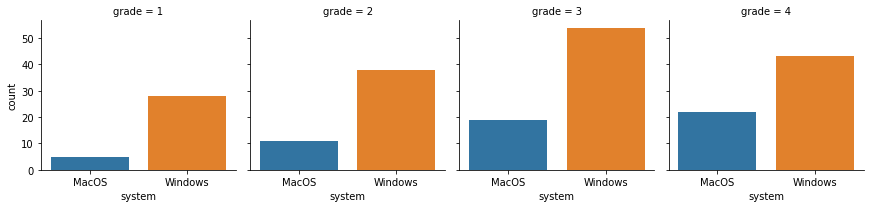

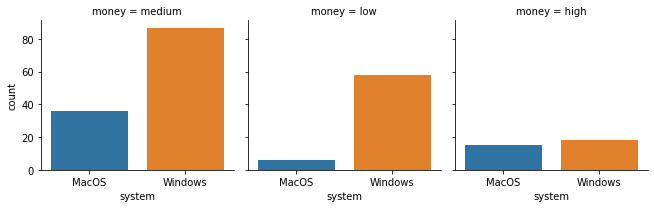

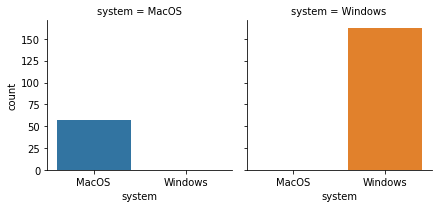

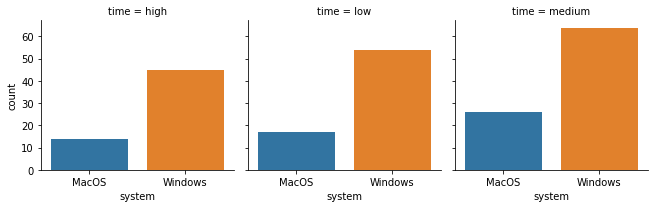

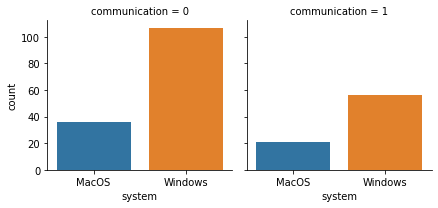

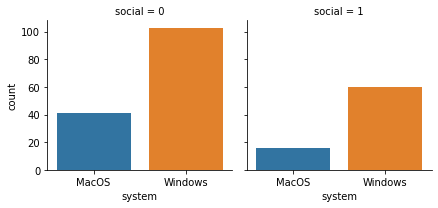

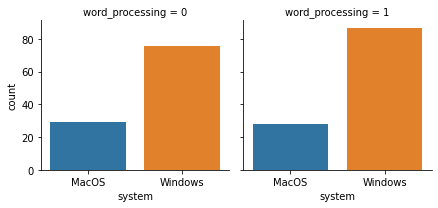

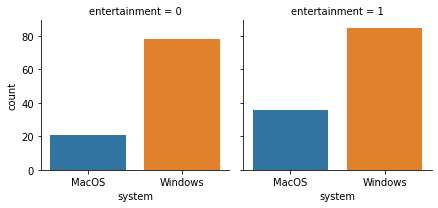

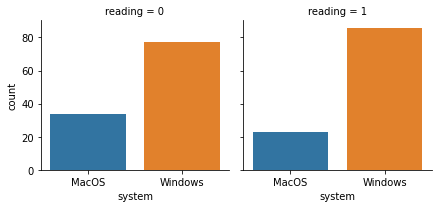

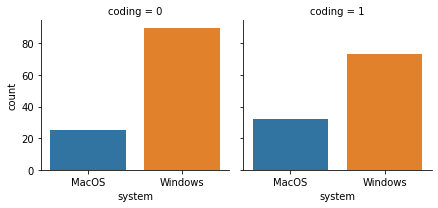

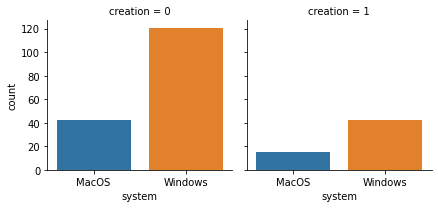

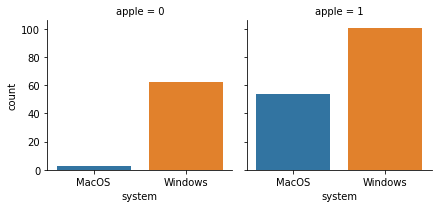

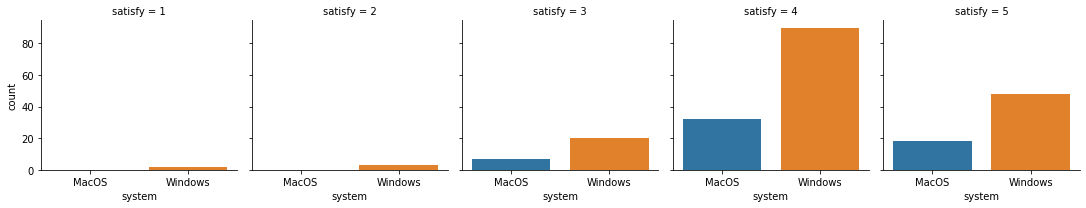

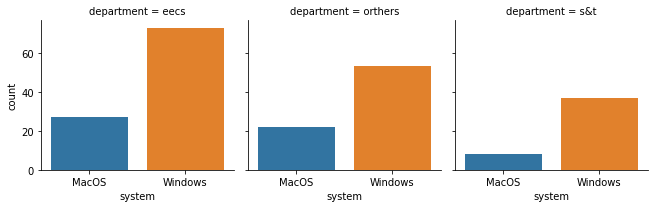

In [5]:
import seaborn as sns
for cols in mydf.columns:
    sns.catplot(x="system", data=mydf, col=cols,kind="count",height=3)

(4)droping useless features

In [6]:
mydf = mydf.drop(['gender','grade','time'], axis=1)
mydf

,money,system,communication,social,word_processing,entertainment,reading,coding,creation,apple,satisfy,department
0,medium,MacOS,0,0,1,1,0,1,0,1,4,eecs
1,medium,MacOS,0,0,1,1,0,1,0,1,5,orthers
2,medium,MacOS,0,0,1,1,0,1,0,1,4,eecs
3,medium,MacOS,1,0,1,0,0,1,0,1,4,eecs
4,medium,MacOS,0,0,0,1,1,1,0,1,4,eecs
...,...,...,...,...,...,...,...,...,...,...,...,...
215,medium,Windows,0,0,1,0,1,1,0,1,4,orthers
216,low,Windows,1,1,1,0,0,0,0,0,4,orthers
217,low,Windows,1,1,0,1,0,0,0,0,4,orthers
218,medium,Windows,1,1,1,0,0,0,0,1,5,orthers


(5) Shuffling

In [7]:
from sklearn.utils import shuffle
mydf = shuffle(mydf)

(6) Adding weights to training data

In [8]:
weighted_mydf = pd.DataFrame(mydf[:150].copy(deep=True)).reset_index()
weighted_mydf = weighted_mydf.drop(['index'], axis=1)
nonweighted_mydf = pd.DataFrame(mydf[:150].copy(deep=True)).reset_index()
nonweighted_mydf = nonweighted_mydf.drop(['index'], axis=1)
mydf = pd.DataFrame(mydf[150:]).reset_index()
mydf = mydf.drop(['index'], axis=1)
weights = []
for i in range(len(weighted_mydf)):
    if weighted_mydf.loc[i,'satisfy'] == '5':
        new_row = pd.Series(weighted_mydf.loc[i])
        weighted_mydf = weighted_mydf.append(new_row)
        weighted_mydf = weighted_mydf.append(new_row)
        weights.append(3)
    elif weighted_mydf.loc[i,'satisfy'] == '4':
        new_row = pd.Series(weighted_mydf.loc[i])
        weighted_mydf = weighted_mydf.append(new_row)
        weights.append(2)
    elif weighted_mydf.loc[i,'satisfy'] == '3':
        weights.append(1)
    elif weighted_mydf.loc[i,'satisfy'] == '2':
        weights.append(0)
        weighted_mydf = weighted_mydf.drop(i)
    else:
        weights.append(-1)
        if weighted_mydf.loc[i, 'system'] == 'Windows':
            weighted_mydf.loc[i, 'system'] = 'MacOS'
        else:
            weighted_mydf.loc[i, 'system'] = 'Windows'

(5) Generating features(X) and target(y)

In [9]:
weighted_X = weighted_mydf.drop(['satisfy', 'system'], axis=1)
weighted_y = weighted_mydf['system']
weighted_X = pd.get_dummies(weighted_X)
nonweighted_X = nonweighted_mydf.drop(['satisfy', 'system'], axis=1)
nonweighted_y = nonweighted_mydf['system']
nonweighted_X = pd.get_dummies(nonweighted_X)
X_test = mydf.drop(['satisfy', 'system'], axis=1)
y_test = mydf['system']
X_test = pd.get_dummies(X_test)

## Results
### Model Construction

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

forest_100 = RandomForestClassifier(n_estimators = 100)
GaussianNB = GaussianNB()
Knn = KNeighborsClassifier(n_neighbors = 20)
Logistic = LogisticRegression()
svm = LinearSVC(C=1, tol=1e-5, max_iter=10000)

### Random Forest

Confusion matrix:
[[ 7 10]
 [13 40]]

Accuracy: 0.6714
              precision    recall  f1-score   support

       MacOS       0.35      0.41      0.38        17
     Windows       0.80      0.75      0.78        53

    accuracy                           0.67        70
   macro avg       0.57      0.58      0.58        70
weighted avg       0.69      0.67      0.68        70

Feature ranking:


NameError: name 'X' is not defined

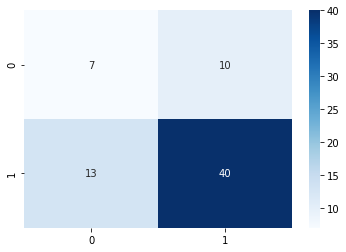

In [17]:
forest_100.fit(nonweighted_X, nonweighted_y, sample_weight=weights)
y_pred = forest_100.predict(X_test)
print('Confusion matrix:')
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print('\nAccuracy: %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
importances = forest_100.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_100.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(nonweighted_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

### Naive-Bayes

Confusion matrix:
[[13  4]
 [15 38]]

Accuracy: 0.7286
              precision    recall  f1-score   support

       MacOS       0.46      0.76      0.58        17
     Windows       0.90      0.72      0.80        53

    accuracy                           0.73        70
   macro avg       0.68      0.74      0.69        70
weighted avg       0.80      0.73      0.75        70



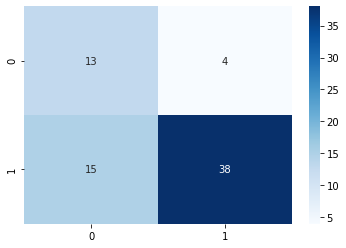

In [12]:
GaussianNB.fit(nonweighted_X, nonweighted_y, sample_weight=weights)
y_pred = GaussianNB.predict(X_test)
print('Confusion matrix:')
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print('\nAccuracy: %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')


### K Nearest Neighbors

Confusion matrix:
[[ 6 11]
 [12 41]]

Accuracy: 0.6714
              precision    recall  f1-score   support

       MacOS       0.33      0.35      0.34        17
     Windows       0.79      0.77      0.78        53

    accuracy                           0.67        70
   macro avg       0.56      0.56      0.56        70
weighted avg       0.68      0.67      0.67        70



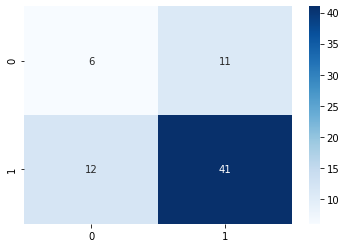

In [13]:
Knn.fit(weighted_X, weighted_y)
y_pred = Knn.predict(X_test)
print('Confusion matrix:')
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print('\nAccuracy: %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

### Logistic Regression

Confusion matrix:
[[ 6 11]
 [ 5 48]]

Accuracy: 0.7714
              precision    recall  f1-score   support

       MacOS       0.55      0.35      0.43        17
     Windows       0.81      0.91      0.86        53

    accuracy                           0.77        70
   macro avg       0.68      0.63      0.64        70
weighted avg       0.75      0.77      0.75        70



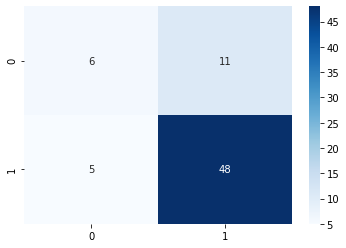

In [14]:
Logistic.fit(nonweighted_X, nonweighted_y, sample_weight=weights)
y_pred = Logistic.predict(X_test)
print('Confusion matrix:')
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print('\nAccuracy: %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

### Linear SVM


Confusion matrix:
[[ 6 11]
 [ 5 48]]

Accuracy: 0.7714
              precision    recall  f1-score   support

       MacOS       0.55      0.35      0.43        17
     Windows       0.81      0.91      0.86        53

    accuracy                           0.77        70
   macro avg       0.68      0.63      0.64        70
weighted avg       0.75      0.77      0.75        70



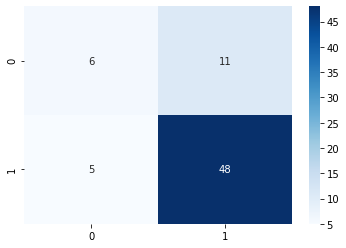

In [15]:
svm.fit(nonweighted_X, nonweighted_y,sample_weight=weights)
y_pred = svm.predict(X_test) 
print('Confusion matrix:')
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print('\nAccuracy: %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')